# <span style="color:#0b486b">SIT 112 - Data Science Concepts</span>
# <span style="color:#0b486b">Data Science Project</span>

---
Lecturer: Sergiy Shelyag | sergiy.shelyag@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC 3215, Australia.

### <span style="color:#0b486b">Due: 5pm, 1st June 2018</span>
---


### <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete the Data Science Project. Some sections have been pre-filled  to help you get started. **The total mark for this project is 100**.

There are two parts in this notebook that require you to complete:

* **Part 1**: *Linear Regression* (**50 marks**)
* **Part 2**: *Classification* (**50 marks**)

Each part includes three main components:
 * **A:** Load a dataset from sklearn and examine it.
 * **B:** Build a training model and make predictions.
 * **C:** Report the results and visualize the data.

Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Project_instructions.pdf*  to know what else you need to complete for this project.

For each cell marked with **# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. 

In the end, you must execute the entire notebook and submit two files:

 1. The source of your solution notebook: **[YourID]_project_solution.ipynb**
 2. And an exported version of your output: **[YourID]_project_output.html**
       
As you go through this notebook:

* markdown cells marked with **Note** mean description sections.
* markdown cells marked with **Instructions** mean the instructions given to you to complete the sections.

Please proceed with the instructions for each part below to complete your programming tasks.

**Note**: The following packages will be required for this assignment. If you need to import more packages, you might append them to the end of the following cell. 

In [32]:
'''
Import packages needed for processing
'''
import numpy as np
from sklearn import datasets
import sklearn.metrics as metrics

from sklearn import linear_model
from sklearn import naive_bayes
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 


%matplotlib inline

'''
If you need add any additional packages, then add them below this line
'''
import random
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# <span style="color:#0b486b">Part 1: Linear Regression</span>

In this part, you will be required to work on Linear Regression for the **diabetes** dataset from sklearn. More about the dataset can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes).


## Part 1A: Load and examine the diabetes dataset

**Instruction 1.1.** Write your code to load the **diabetes** dataset from sklearn and assign it to a variable called `diabetes`.

[**Total mark: 3**]

In [33]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
1. Write your code to load the **diabetes** dataset from sklearn 
    and assign it to a variable called `diabetes`.
'''
diabetes = datasets.load_diabetes()

print(diabetes.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


**Note:** `diabetes` is a dictionary with two keys: *'data'* - a numpy 2D array containing the features and *'target'* containing the labels. The cell code below assigns the data to variable `X` and the labels to variable `Y`. Run the cell and use `X` and `Y` for later tasks.

In [34]:
X = diabetes['data']
Y = diabetes['target']

**Instruction 1.2.** Now you need to examine the size of data. Write your code to find and print out the number of **samples** and the number of **features** in the dataset.

[**Total mark: 2**]

In [35]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
2. Write your code to find and print out the number of **samples** 
    and the number of **features** in the dataset.
    Using variable X.
'''
print('The number of samples:')
# INSERT YOUR CODE HERE
print(len(X))
print('The number of features:')
# INSERT YOUR CODE HERE
print(len(X[0]))

The number of samples:
442
The number of features:
10


**Instruction 1.3.** We also need to get a brief understanding about the task by doing some statistics on the labels.

**Your tasks are:**

1. Write your code to print the **min**, **max** and **median** of the labels. (3 marks)
2. Construct a **box-plot** for the labels. (2 marks)

[**Total marks: 5**]

In [36]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
1. Write your code to print the min, max and median of the labels.
    Using variable Y.
'''

# print the min, max and median for the labels Y.
# INSERT YOUR CODE HERE
print("Minimum for labels Y:",min(Y))
print("Maximum for labels Y:",max(Y))
print("Median for labels Y:",np.median(Y))

Minimum for labels Y: 25.0
Maximum for labels Y: 346.0
Median for labels Y: 140.5


Text(0.5, 1.0, 'Box-plot for the labels')

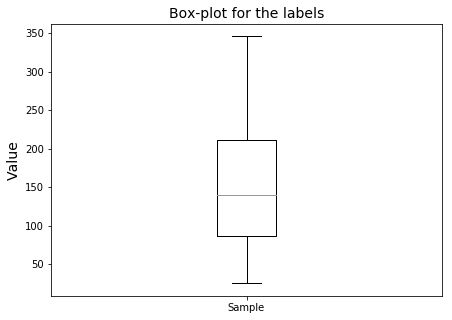

In [37]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
2. Construct a box-plot for the labels.
'''

# construct a box-plot for the labels
# INSERT YOUR CODE HERE

fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams.update({'font.size': 14})
ax.boxplot(Y, 0, labels=["Sample"])
ax.set_ylabel('Value', fontsize=14)
ax.set_title('Box-plot for the labels', fontsize=14)

## Part 1B. Linear Regression

You are required to apply Linear Regression to train and make predictions on the **diabetes** dataset.

**Note:** To perform a supervised learning task, we need to train the model on a training set of the input data and the correct labels, and predict the trained model on **unseen** data. Then, we use the correct labels of the **unseen** data to evaluate the performance of the model. The **unseen** dataset is called the **test set**.

**Instruction 1.4.** First you need to split the **diabetes** dataset into a training set and a test set. We will use 70% samples for training and 30% for testing. Print the number of samples in each set.

[**Total marks: 5**]

In [38]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# first, compute the number of samples in the training set:
n_train = int(len(Y) * 0.7)

# The training set is the first n_train samples in the dataset
X_train = X[: n_train]
Y_train = Y[: n_train]

# The test set is the remaining samples in the dataset
X_test = X[n_train :]
Y_test = Y[n_train :]

# Print the number of samples in the training set
print('The number of samples in the training set:')
print(len(X_train))
# Print the number of samples in the test set
print('The number of samples in the test set:')
print(len(X_test))


The number of samples in the training set:
309
The number of samples in the test set:
133


**Instruction 1.5.** Create a Linear Regression model called `lr`.

[**Total marks: 5**]

In [39]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

lr = linear_model.LinearRegression()

**Instruction 1.6.** Fit the training data to the `lr` model.

[**Total marks: 5**]

In [40]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Instruction 1.7** Predict the output of the test set.

[**Total marks: 5**]

In [41]:
Y_pred = lr.predict(X_test)
print(Y_pred)

[139.99381608 205.02640697 176.97778704 122.05974488 213.18077169
 174.98852064 112.65389212 202.82658131 172.35243033 164.47418705
 196.15962387 192.54406753 293.90068958 299.7465604  232.76334834
 213.53873831 228.48533512 157.1751098  226.27609511 194.21368886
 101.82219913 174.76393876 111.17348152 294.07940325 179.7869339
  76.42319163  85.90565583 259.9593708  168.07240778 119.57919313
 150.68038442 164.06743377 179.24446569 159.59344772 155.87358338
 143.36467882 123.92736711 176.618279   103.82379184 133.74527488
  90.94561588 253.81583777  84.12062018  61.3713544  177.97627662
 196.51767018 130.92146865  88.54111378 199.91912195  53.81979958
 173.22993854 198.32897556 121.58954455 233.94327416 161.48314734
 161.86371717 166.464451   261.38157828 260.15223634 204.29534606
 187.46774384  60.21859679 205.12037857 107.69117313 143.08887348
 127.96638789 174.54142953 213.69268751 162.95717781 160.21421003
 137.66760774 173.22737347  70.19308694 262.04969756 111.92846102
 106.783082

## Part 1C. Results and Visualization

**Note:** To evaluate the performance of a Linear Regression model, two commonly used measures are **mean absolute error** and **root mean squared error**.

**mean absolute error** is defined by:

$$mean\_absolute\_error(Y_{test}, Y_{pred}) = \frac{1}{n_{samples}}\sum_{i=1}^{n_{samples}}|y_{test}^i - y_{pred}^i|$$

**root mean squared error** is defined by:

$$root\_mean\_squared\_error(Y_{test}, Y_{pred}) = \sqrt{\frac{1}{n_{samples}}\sum_{i=1}^{n_{samples}}(y_{test}^i - y_{pred}^i)^2}$$


**Instruction 1.8.** Compute **mean absolute error** and **root mean squared error** between the correct labels and the predictions of the test set and print these two values.

[**Total marks: 8**]

**Hint:** You might need to use [Regression metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) from sklearn.

In [42]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# Compute the mean absolute error between Y_test and Y_pred
# Then, print the value
value_orig = [Y_test]
value_pred = [Y_pred]
print("The mean absolute error is:", mean_absolute_error(value_orig, value_pred))


# Compute the root mean squared error between Y_test and Y_pred
# Then, print the value
value_orig1 = [Y_test]
value_pred2 = [Y_pred]
lol = mean_squared_error(value_orig1, value_pred2)
root_mean = sqrt(lol)

print("The root mean squared error is:", root_mean)



The mean absolute error is: 40.871175845654435
The root mean squared error is: 52.174426892911136


**Note:** Visualisation is an important task. We want to see if two similar samples are predicted with two close labels. To evaluate how similar two samples are, we can compute their Euclidean distance and to evaluate how close the two labels are, we just need to compute their absolute difference.

The function below returns a Euclidean distance matrix whose element (i, j) stores the Euclidean distance between X[i] and X[j]. **You will need this function for a subsequent task.**

In [43]:
def compute_euclidean_distance_matrix(X):
    n_samples = X.shape[0]
    
    # initialise the distance matrix and set all value to 0
    euclidean_distance_matrix = np.zeros([n_samples, n_samples], dtype=float)
    
    # compute the Euclidean distance matrix
    for i in range(n_samples):
        for j in range(n_samples):
            euclidean_distance_matrix[i, j] = np.sqrt(np.sum((X[i] - X[j]) ** 2))
            
    return euclidean_distance_matrix

**Instruction 1.9**. The following code segment is designed to visualise the Euclidean distances of the samples and the absolute differences of their predicted labels.

**Your tasks are:**

1. Construct a function that returns a matrix of absolute differences of the prediction **Y_pred** whose element (i, j) stores the absolute difference between Y_pred[i] and Y_pred[j]. (4 marks)

2. Compute the absolute difference matrix for **Y_pred** and visualise the matrix. (4 marks)

3. Compute the Euclidean distance matrix for **X_test** using compute_euclidean_distance_matrix() and visualise the matrix. (4 marks)

[**Total mark: 12**]

In [44]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
1. Construct a function that returns a matrix of absolute difference of 
    the prediction **Y_pred** whose element (i, j) stores 
    the absolute difference between Y_pred[i] and Y_pred[j].
'''
def compute_abs_difference_matrix(Y):
    n_samples = X.shape[0]
    
 
    absolute_distance_matrix = np.zeros([n_samples, n_samples], dtype=float)
    
    # compute the Euclidean distance matrix
    for i in range(n_samples):
        for j in range(n_samples):
            absolute_distance_matrix[i, j] = (np.sum((X[i] - X[j])))
            
    return absolute_distance_matrix
   
    
    

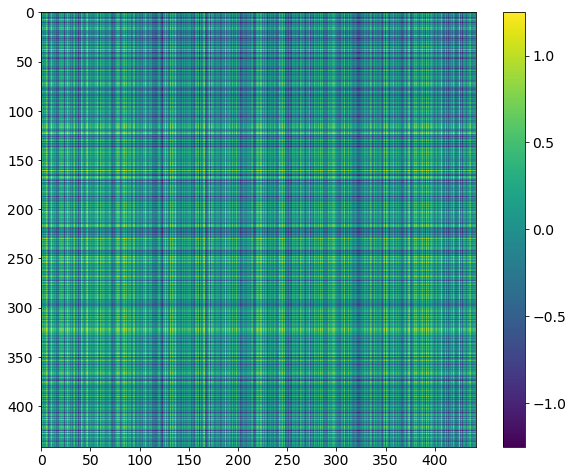

In [45]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
2. Compute the absolute difference matrix for Y_pred and visualise the matrix
Hint: You might want to use imshow function.
'''

# compute the absolute difference matrix
abs_difference_matrix = compute_abs_difference_matrix(Y_pred)

# visualise the matrix
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(abs_difference_matrix)
cbar = fig.colorbar(cax)



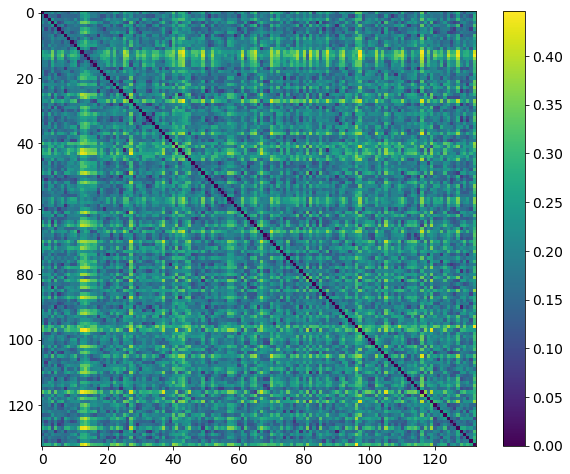

In [46]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
3. Compute the Euclidean distance matrix for X_test and visualise the matrix.
Hint: You might want to use imshow function
'''

# compute the Euclidean distance matrix
Euclidean_distance_matrix = compute_euclidean_distance_matrix(X_test)

# visualise the matrix
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(Euclidean_distance_matrix)
cbar = fig.colorbar(cax)



# <span style="color:#0b486b">Part 2: Classification</span>

In this part, you will be required to apply Naive Bayes algorithm for the classification task on the **breast cancer** dataset from sklearn. More about the dataset can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer). 

Here, we apply Multinomial Naive Bayes for discrete features. We can construct a Multinomial Naive Bayes model by calling **naive_bayes.MultinomialNB()** from sklearn package. More about the model can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)


## Part 2A: Load and examine the dataset

**Instruction 2.1.** Write your code to load the **breast cancer** dataset from sklearn and assign it to a variable called `cancer`.

[**Total mark: 3**]

In [47]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
1. Write your code to load the dataset from sklearn and assign it to a variable called `cancer`.
'''
cancer = datasets.load_breast_cancer()

print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


**Note:** The cell code below assigns the data to variable `X` and the labels to variable `Y`. Run the cell and use `X` and `Y` for later tasks.

In [48]:
X = cancer['data']
Y = cancer['target']

**Instruction 2.2.** Now you need to examine the size of data. Write your code to find and print out the number of **samples** and the number of **features** in the dataset.

[**Total mark: 2**]

In [49]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
2. Write your code to find and print out the number of **samples** 
    and the number of **features** in the dataset.
    Using variable X.
'''
print('The number of samples:')
print(len(X))

print('The number of features:')
print(len(X[0]))


The number of samples:
569
The number of features:
30


**Instruction 2.3.** The following code segment is designed to do some statistics on the labels to get a brief understanding about the prediction task. This is a classication task, it is important to know the number of categories (or number of classes) in the dataset and their frequencies.

**Your tasks are:**

1. Write your code to compute and print the number of classes in the dataset. (2 marks)
2. Write your code to compute and print the number of occurrences of each class. (3 marks)

[**Total marks: 5**]

In [50]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
1. Write your code to compute and print the number of classes in the dataset.
    Using variable Y.
'''

# compute and print the number of classes.
compute_class = list(Y)

number_of_class = np.unique(compute_class)
print(len(number_of_class))



2


In [51]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
2. Write your code to compute and print the number of occurrences of each class.
'''

# compute and print the number of occurrences of each class
number_of_occurrences = np.array(np.unique(compute_class, return_counts=True, axis=None))
print(number_of_occurrences)


[[  0   1]
 [212 357]]


## Part 2B. Classification with Naive Bayes

You are required to apply Naive Bayes to train and make predictions on the **breast cancer** dataset.

Multinomial Naive Bayes classifier is used for discrete data. The features of the breast cancer dataset are however real values. The function below discretise the features in to 0 (low), 1 (middle) and 2 (high). **Run the cell below.**

In [52]:
def discretise(X):
    # for each feature, values smaller than 33% percentile are set by 0 (low), 
    # from 33% to 67% percentile are set by 1 (middle) and other are set by 2 (high).
    
    n_feats = X.shape[-1]
    X_discrete = np.zeros(X.shape)
    
    for i in range(n_feats):
        # compute val1 and val2 as the percentile of 33% and 67%, respectively of the column i
        val1, val2 = np.percentile(X[:, i], 33), np.percentile(X[:, i], 67)   
        
        # increase all discrete values by 1 for all values in X that larger than val1
        ids = np.where(X[:, i] > val1)[0]
        X_discrete[ids, i] += 1
        
        # increase all discrete values by 1 for all values in X that larger than val2
        ids = np.where(X[:, i] > val2)[0]
        X_discrete[ids, i] += 1
        
    return X_discrete


Then we call the discretise function for the feature X. **Run the cell below and your data are ready for classification.**

In [53]:
X = discretise(X)

**Instruction 2.4.** Similar to **Part 1**, you need to split the dataset into a training set and a test set. We will use 70% samples for training and 30% for testing. Print the number of samples in each set.

[**Total marks: 5**]

In [54]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# first, compute the number of samples in the training set:
n_train = int(len(Y) * 0.7)

# The training set is the first n_train samples in the dataset
X_train = X[: n_train]
Y_train = Y[: n_train]

# The test set is the remaining samples in the dataset
X_test = X[n_train :]
Y_test = Y[n_train :]

# Print the number of samples in the training set
print('The number of samples in the training set:')
print(len(X_train))

# Print the number of samples in the test set
print('The number of samples in the test set:')
print(len(X_test))

The number of samples in the training set:
398
The number of samples in the test set:
171


**Instruction 2.5.** Create a Multinomial Naive Bayes model called `mnb`.

[**Total marks: 5**]

In [55]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

mnb = naive_bayes.MultinomialNB()

**Instruction 2.6.** Fit the training data to the `mnb` model.

[**Total marks: 5**]

In [56]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

mnb.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Instruction 2.7** Predict the output of the test set.

[**Total marks: 5**]

In [57]:
Y_pred = mnb.predict(X_test)
print(Y_pred)

[1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0
 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0
 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1]


# Part 2C. Results and Visualization

**Note:** To evaluate the performance of a classification task, commonly used measures are **accuracy**, **precision**, **recall** and **f1-score**.

**Instruction 2.8.** Compute the **accuracy**, **precision**, **recall** and **f1-score** of the predictions on the test set and print these values.

[**Total marks: 12**]

**Hint:** You might need to see [Classification metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) from sklearn.

In [58]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# Compute and print the accuracy of predictions on the test set
from sklearn.metrics import accuracy_score
y_pred = (Y_pred)
y_true = (Y_test)
print(accuracy_score(y_true, y_pred))


# Compute and print the precision of predictions on the test set
from sklearn.metrics import precision_score
print(precision_score(y_true, y_pred))

# Compute and print the recall of predictions on the test set
from sklearn.metrics import recall_score
print(recall_score(y_true, y_pred))

# Compute and print the f1-score of predictions on the test set
from sklearn.metrics import f1_score
print(f1_score(y_true, y_pred))


0.7309941520467836
0.9886363636363636
0.6590909090909091
0.790909090909091


**Note:** We have evaluated the performance of the classification task by different measures. Now, we want to visualise the data as well as the predicted labels. [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) is a tool to convert high-dimensional data into low-dimensional ones. To visualise the data, we can use t-SNE to reduce the data dimension to 2D.

The following function `reduce_to_2D` takes the matrix X of size (n_samples, n_features) and returns a matrix of size (n_samples, 2), which is a dimension-reduced version of X. **You will need this function for a subsequent task**.

In [59]:
def reduce_to_2D(X):
    tsne = TSNE(n_components=2, random_state=1)
    new_X = tsne.fit_transform(X)
    return new_X

**Instruction 2.9**. Visualisation.

**Your tasks are:**

1. Create a variable named `X_test_2D` that is the dimension-reduced version of X_test using function `reduce_to_2D`. (4 marks)

2. Visualise `X_test_2D` using scatter() with the colors being the corresponding predicted labels. (4 marks)


[**Total mark: 8**]

In [60]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
1. Create a variable named `X_test_2D` 
    that is the dimension-reduced version of X_test using function `reduce_to_2D`.
'''

X_test_2D = reduce_to_2D(X_test)

Text(0.5, 1.0, 'Visualising')

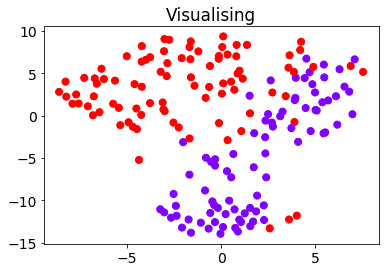

In [61]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
2. Visualise `X_test_2D` by scatters with the colors being the corresponding predicted labels.
'''

fig, ax = plt.subplots()
ax.scatter(X_test_2D[:, 0], X_test_2D[:, 1],c=Y_pred,s=50,cmap='rainbow');
ax.set_title("Visualising")
